I use EXP-4 100 rows for testing mlae.

In [1]:
import pandas as pd

from mlaetest import uniqueallmodels, llamaunique, Cleveland_McGill, MLAE_per_instance, display_one_image, display_two_images

balanced_df = pd.read_csv('balanceddata.csv')

df = balanced_df

Daniel, I found something interesing here

From your code: [run_position_angle.py](https://github.com/haehn/perception/blob/master/EXP/run_position_angle.py),  

I found you are using this calculation:  

```python
MLAE = np.log2(sklearn.metrics.mean_absolute_error(y_pred * 100, y_test * 100) + 0.125)
```

And I think this is the correct calculation for **Cleveland and McGrill**.  

However, at the beginning, I follow this caculation from this link:  
[LLMP/evaluator.py](https://github.com/kenichi-maeda/LLMP/blob/main/LLMP/evaluator.py)  

I originally used this MLAE calculation for our project:  

```python
mlae = np.log2(mean_absolute_error(gt_array, answers_array) + 0.125)
```

My Thought:  
I think I **did not** use Cleveland and McGrill's MLAE calculation for our project.

I also found something interesting here. First, I want to see each unique value for all models.

In [2]:
uniqueallmodels(df)


Unique Predicted Values for CustomLLaMA:
[ 9. 10.  3.  2.  7.  4.  1.  6.  5.  8.]

Unique Predicted Values for Gemini1_5Flash:
[7. 6. 8.]

Unique Predicted Values for GeminiProVision:
[7. 2. 4.]

Unique Predicted Values for LLaMA:
[  4.   5.   3.  10.   6.  15.   7. 100.   2.   8.   9.  20.  52.  36.
  50.   1. 145.  35.  40.  30.  13. 140.  24. 152.  55.  90.  45. 300.
  16.]

Unique Predicted Values for gpt4o:
[ 9. 10.  5.  7.  3.  8.  6.  4.  2.]


As you can see all predicted values are under the ground truth range, however, there are some outliers for llama model. 

Then I would like to see how llama model distributed each unique value.

In [3]:
llamaunique(df)


Example MLAE Calculation for LLaMA (all rows):
Predictions: [  4.   5.   5.   3.  10.   6.   4.  15.   6.   6.   5.   7.   6.   6.
  10.   4.   5.   6.   6.   7.   5.   5.   6.   6.  10.   7.   4.   5.
 100.   4.   2.   6.   4.   6.   6.   3.   4.   4.   6.   4.   6.   4.
   3.   7.   7.   7.   4.   4.   7.   7.  10.   7.   6.   6.   5.   7.
   7.   5.   6.   3. 100.  10.   8.   6.   6.   4.   7.   7.   5.   9.
   7.   6.   6.   4.   4.  20.   6.   6.   3.   3.   3.   5.   5.  52.
  36.   4.   3.   5.   6.   6.   6.   3.   6.   6.   4.  10.   5.  50.
   4.   6.  10.   6.   5.   7.   5.   6.   6.   7.   5.   3.   3.   6.
   5.   3.   7.   4.   2.   5.   3.   5.  10.   6.   5.   5.   4.   6.
   7.   7.   1.  10.   5.   6.   6.   3.   5.   2.   3.   4.   5.   3.
   5.   6.   6.   3.   4.   4.   6.   6.   5.   4.   5.   2.   4.   4.
   5.   6.   3.   6.   4.   4.   4. 145.   6.   3.  10.   4.   5.   7.
   6.   4.   3.   5.   7.   6.   5.   5.   6.   5.   6.   6.   6.   6.
   4.   3.   3. 

As you can see from distribution of unique value of llama. They have only few outliers are distributed. 

Then my next step is I use ChatGPT to demo two MLAE caculation to see how it actually works.

I select gpt-4o and llama model for my demo. I involve ChatGPT's here to give me some examples then I can see the real differences between two caculations.

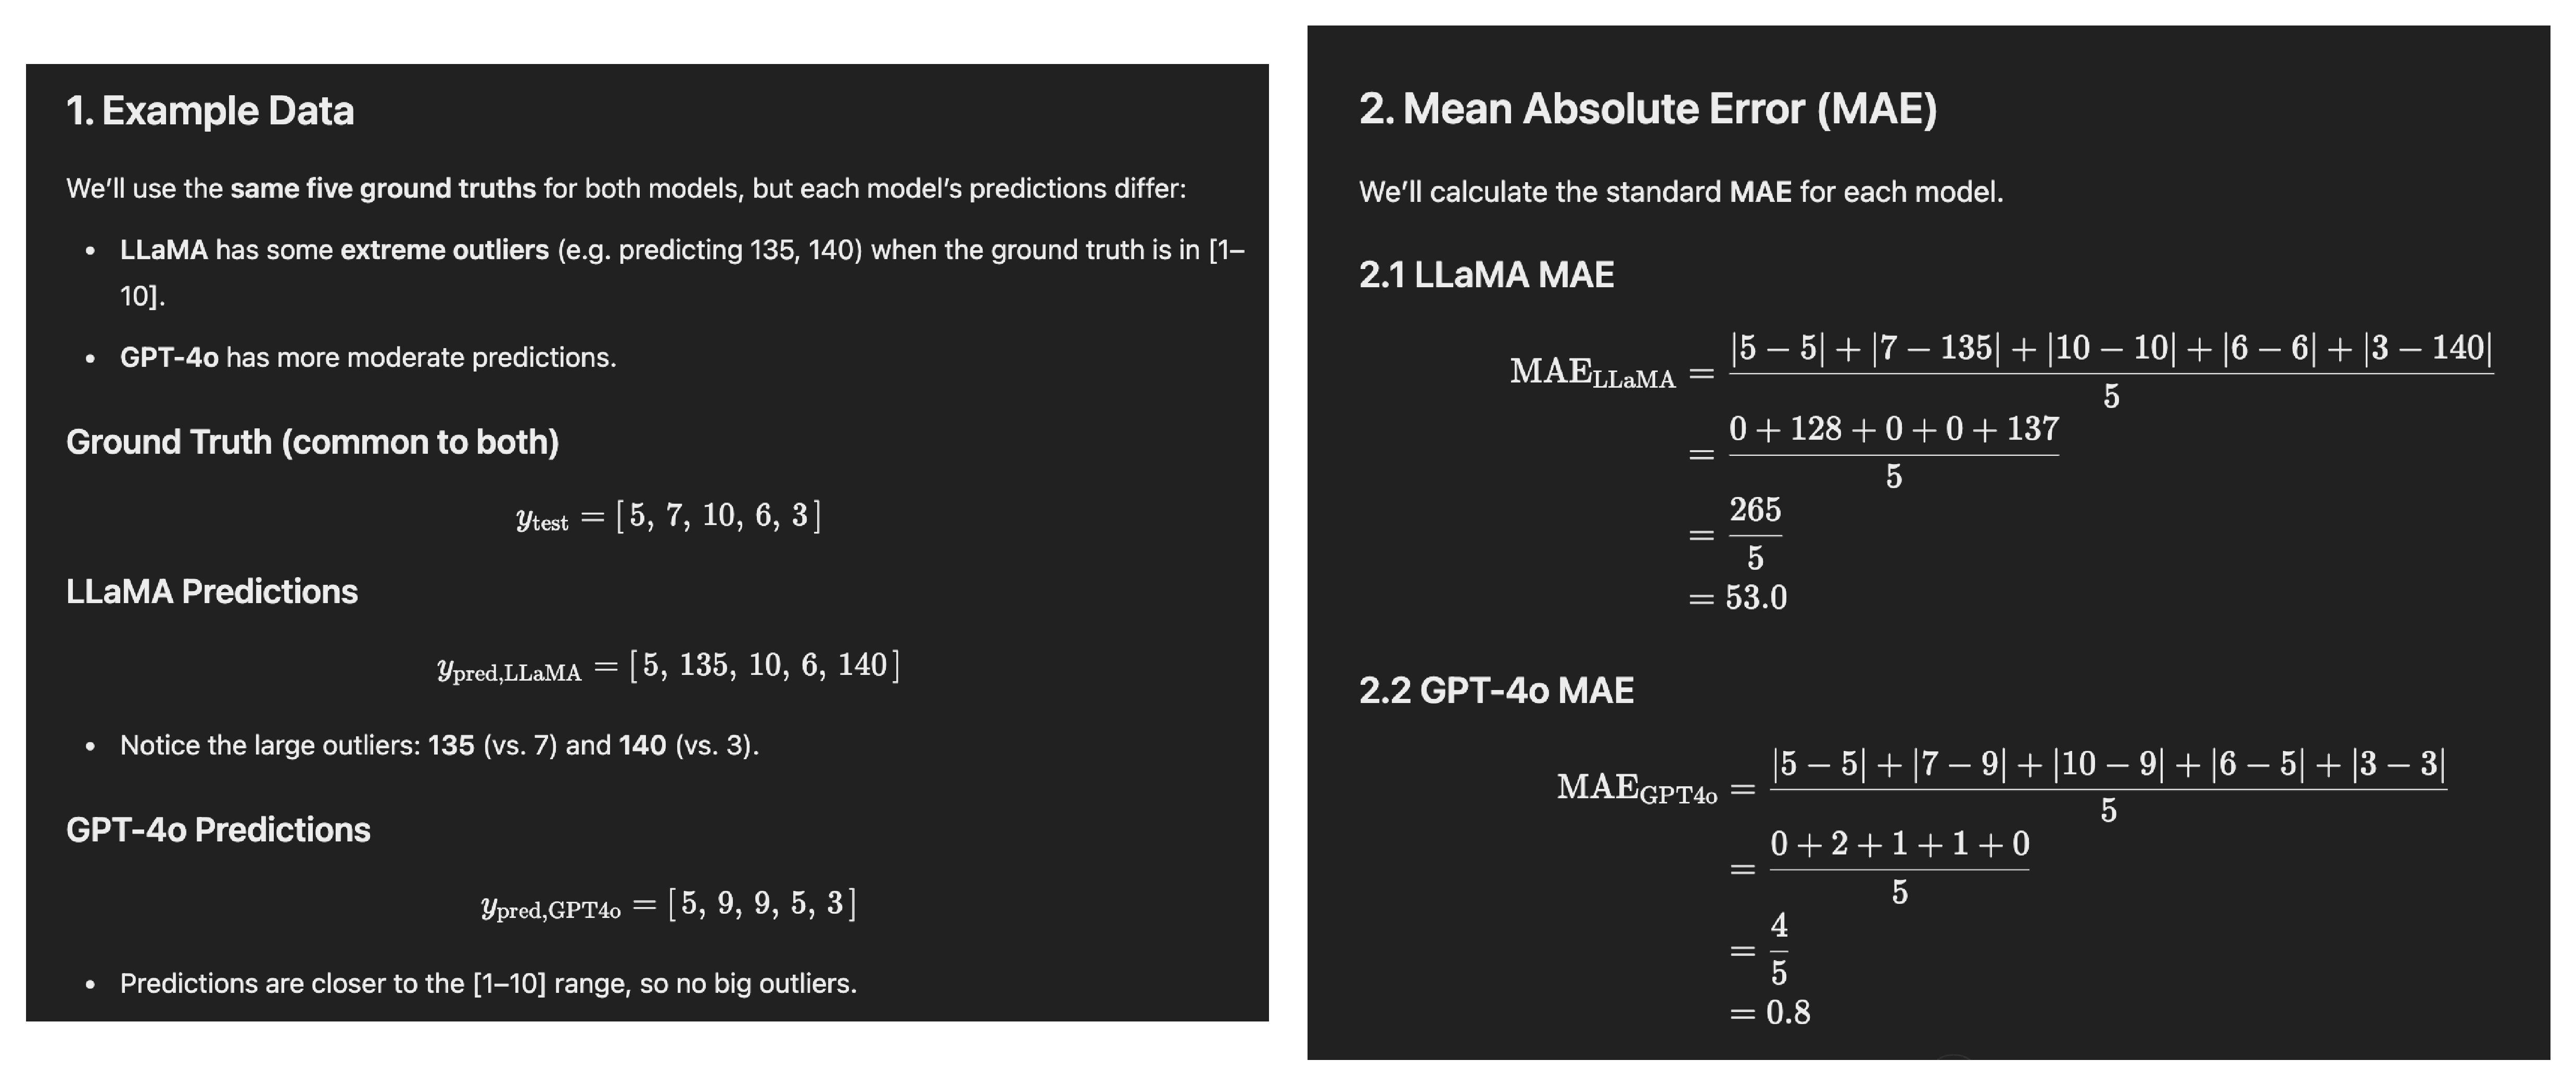

In [4]:
image_path1 = "dataexample.png"
image_path2 = "MAE.png"

display_two_images(image_path1, image_path2)



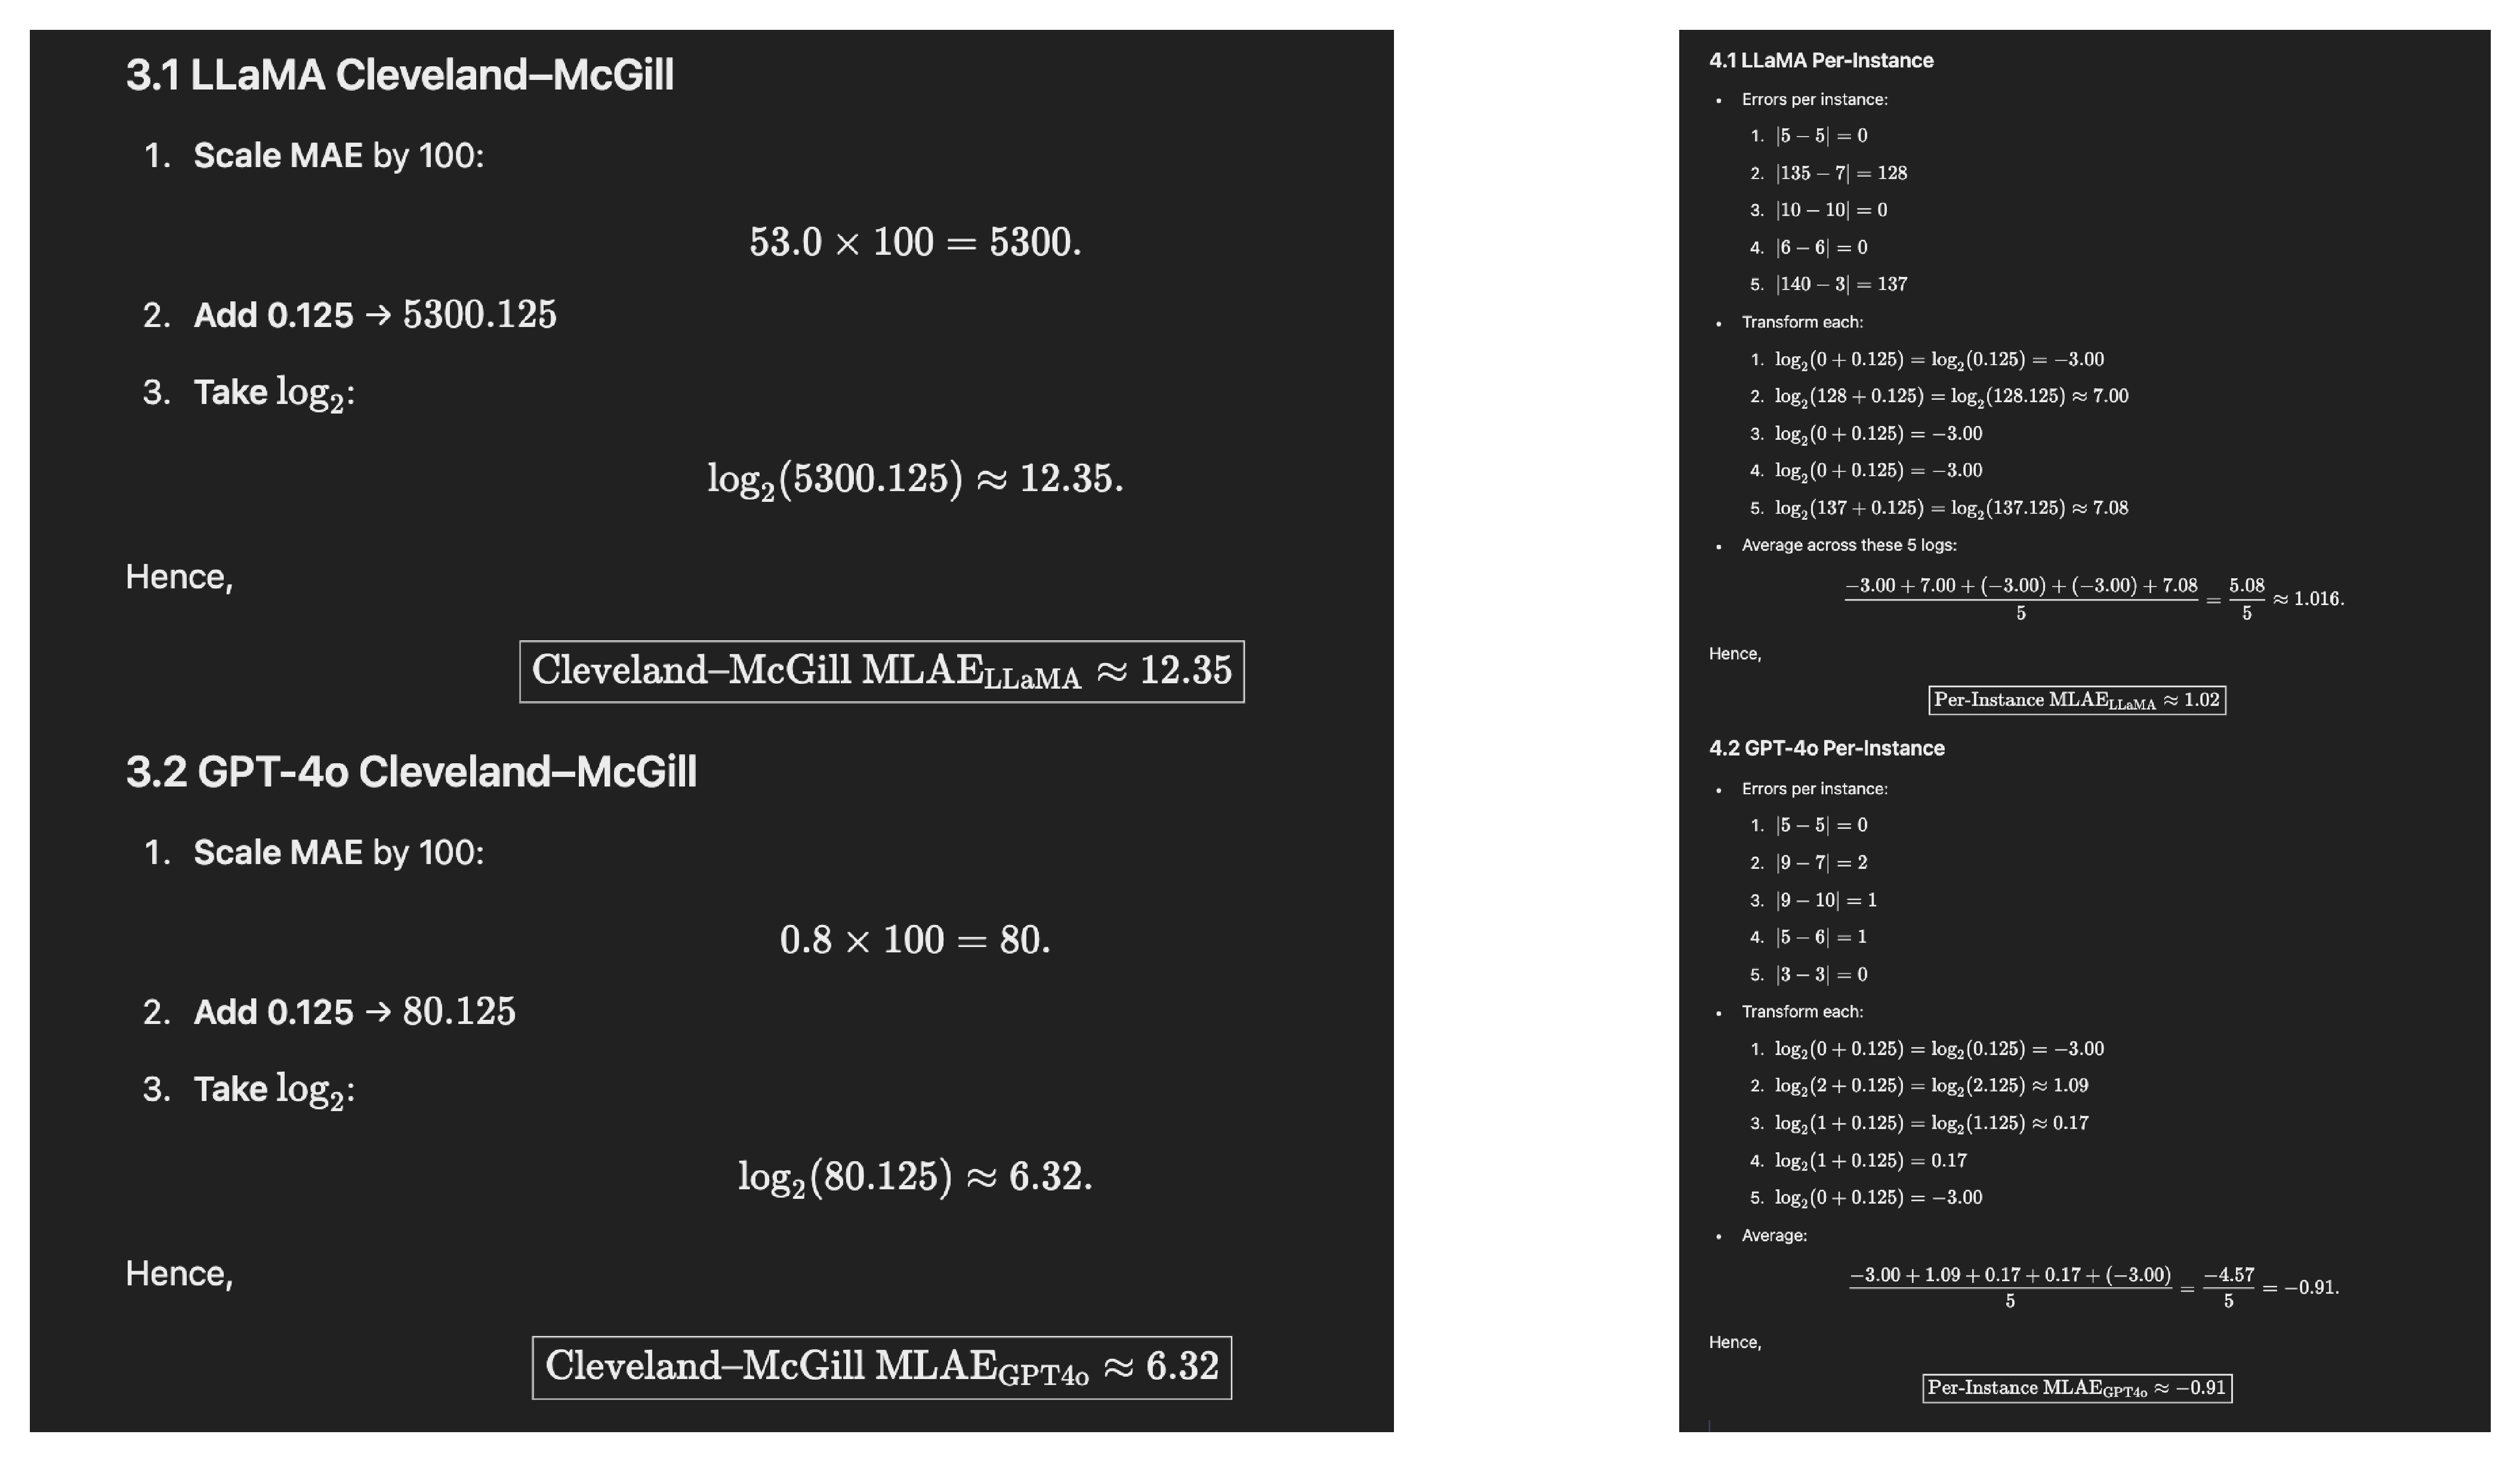

In [5]:
image_path1 = "clevelandmcgill.png"
image_path2 = "mlaeper.png"

display_two_images(image_path1, image_path2)

Daniel –

My personal opinion on this is:

If we use the Cleveland-McGill MLAE, it’s going to amplify the errors by 100%, which might not be ideal in this case.

Looking at the list of unique values across models, only LLaMA has a few outliers (like 135, 140), while GPT-4o does not. The Cleveland-McGill calculation averages everything first and then logs it, which means even a small number of extreme values can heavily impact the final score. That’s why the errors are so large (e.g., 12.35 for LLaMA vs. 6.32 for GPT-4o), even though GPT-4o doesn't actually have outliers.

Since the outliers are rare, I think we should use Per-Instance MLAE instead. This way, we focus on the overall performance of each model without letting a few extreme cases dominate the results. 

What do you think, Daniel? Give me some advices ^---^ 